In [1]:
import sys,os
from tools.tools import save,load,lprint,load_config
from fitlab.resman import RESMAN
import numpy as np
from qcdlib.aux import AUX
from external.PDF.CT10 import CT10
from obslib.sidis.stfuncs import STFUNCS
from external.LSSLIB.LSS import LSS
from external.DSSLIB.DSS import DSS
from qcdlib.tmdlib import PDF,PPDF,FF,GK
import matplotlib.patches as mpatches
import pylab as py

# Import parameters from inputs file

In [2]:
conf={}
conf['path2upol_compass'] ='../fitlab/inputs/upol_compass.py'
conf['path2CT10'] ='../external/PDF'
conf['path2LSS']='../external/LSSLIB'
conf['path2DSS']='../external/DSSLIB'
    
conf['order']='LO'
conf['aux']  =AUX()
#  conf['_pdf'] =CJ(conf)
conf['_pdf'] =CT10(conf)
conf['_ppdf']=LSS(conf)
conf['_ff']  =DSS(conf)
    
conf['pdf']=PDF(conf)
conf['ppdf']=PPDF(conf)
conf['ff']=FF(conf)
conf['gk']=GK(conf)
    
stfuncs=STFUNCS(conf)

hadron='pi+'

stfuncs = STFUNCS(conf)
def FUUB(x, z, Q2, b):
    return stfuncs.get_FX_b(1,x,z,Q2,10.0,b,'p','pi+')+stfuncs.get_FX_b(1,x,z,Q2,0.0,b,'n','pi+')

# Generate kinematics values matching Alexei's bins

In [3]:
xBin=[0.003,0.008,0.013,0.02,0.032,0.055,0.1,0.21,0.4]
Q2Bin=[1,1.7,3,7,16,81]
xvals = [(xBin[i+1]-xBin[i])/2+xBin[i] for i in range(len(xBin)-1)]
Q2vals = [(Q2Bin[i+1]-Q2Bin[i])/2+Q2Bin[i] for i in range(len(Q2Bin)-1)]
zvals = [0.2, 0.3, 0.4]

# Generate data in kinematic bins

In [4]:
data5001 = {}
for Q2 in Q2vals:
    data5001[str(Q2)] = {}
    for x in xvals:
        data5001[str(Q2)][str(x)] = {}
        for z in zvals:
            data5001[str(Q2)][str(x)][str(z)] = {}
            bT = np.logspace(-1, 1, 50)
            data5001[str(Q2)][str(x)][str(z)]['bT'] = bT
            data5001[str(Q2)][str(x)][str(z)]['FUUB'] = [b*FUUB(x, z, Q2, b) for b in bT]

# Plot in bins

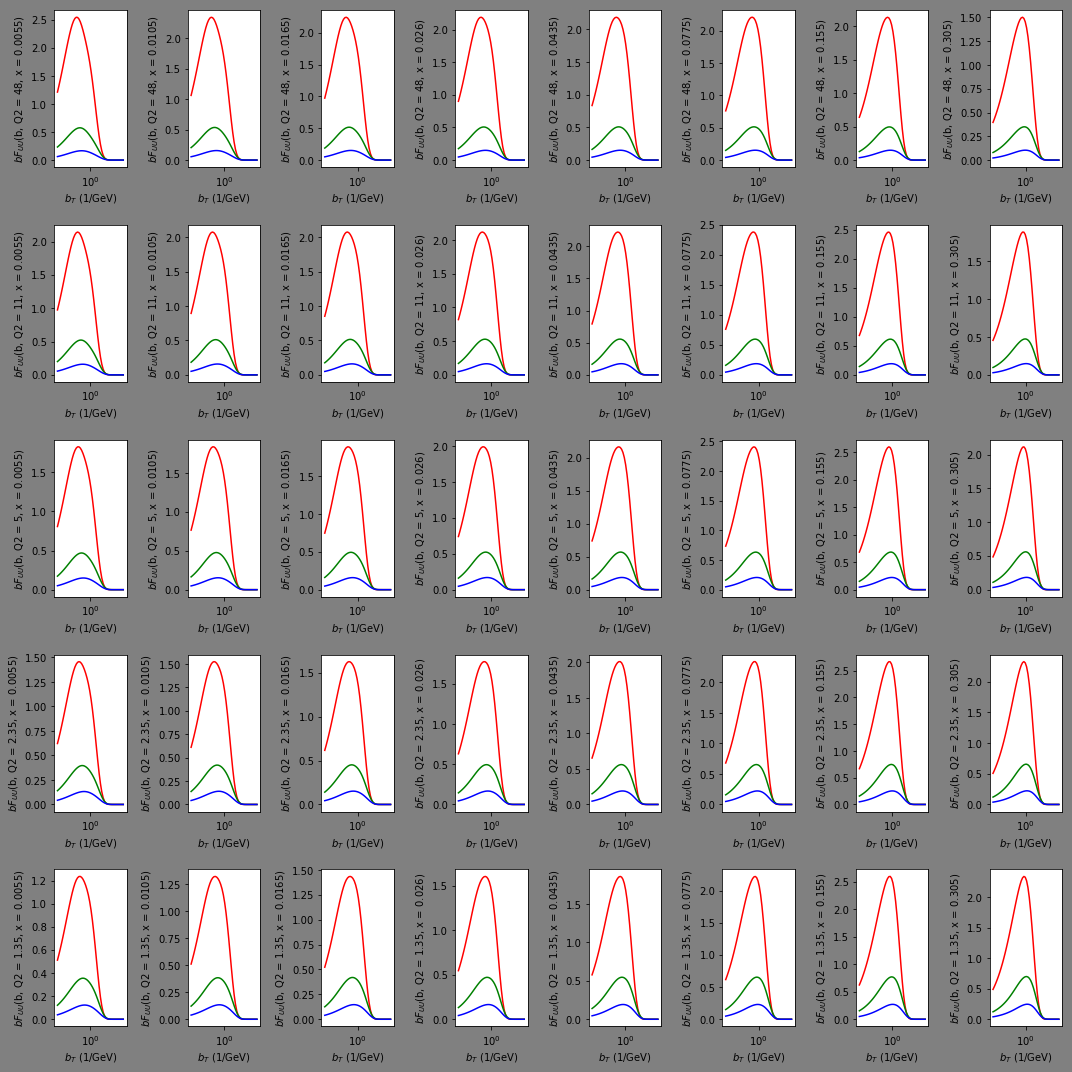

In [5]:
fig=py.figure(figsize=(15, 15),facecolor="gray")
ax=fig.add_axes([0,0,1,1])
ax.set_yticklabels([0]+Q2Bin)
ax.set_xticklabels([0]+xBin)

# Set legend
#Zcolor=["red","green","blue"]
#Zpatch1 = mpatches.Patch(color=Zcolor[0], label='z=0.2')
#Zpatch2 = mpatches.Patch(color=Zcolor[1], label='z=0.3')
#Zpatch3 = mpatches.Patch(color=Zcolor[2], label='z=0.4')
#ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3],loc='upper left')
#ax.grid()

k=1 #counter
for Q2 in Q2vals[::-1]:
    for x in xvals:
        datadic = data5001[str(Q2)][str(x)]
        ax = py.subplot(5,8,k)
        for z in zvals:
            if z == 0.2:
                color = 'r-'
            elif z == 0.3:
                color = 'g-'
            elif z == 0.4:
                color = 'b-'
            ax.plot(datadic[str(z)]['bT'],datadic[str(z)]['FUUB'],color)
        ax.legend()
        k+=1 #add one to counter
        ax.set_xlabel(r"$b_T$ (1/GeV)")
        ax.set_ylabel(r"$b F_{UU}$(b, Q2 = " + str(Q2)+", x = "+str(x)+")")
        ax.semilogx()
py.tight_layout()
py.show()